<a href="https://colab.research.google.com/github/relfarizi/Final_Project/blob/master/drugDiscovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library

### - Install RDKIT

In [2]:
# Install rdkit

def install_rdkit():
  !wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
  !chmod +x Miniconda3-latest-Linux-x86_64.sh
  !time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
  !time conda install -q -y -c conda-forge rdkit

# install_rdkit()

### - Library

In [3]:
# Data

#from google.colab import files
import pandas as pd
import numpy as np
import regex as re

# rdkit
import sys
#sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit import Chem
from rdkit.Chem import DataStructs,AllChem

# random
import random as rd

import matplotlib.pyplot as plt

import math

## 2. Data

### Pre-Processing Data

In [4]:
def preprocessing_data(link_of_data) :
  dataset = pd.read_csv(link_of_data,sep=";")
  dataset = dataset.iloc[:,[0,7,9,10,11]]

  sameMol = []
  sameMolCount = {}
  dataset_handle = []

  # drop Nan value
  mol_smiles = dataset.iloc[:,1].values.tolist()
  row_drop = []
  for i in range(len(mol_smiles)) :
    if len(str(mol_smiles[i])) < 5 :
      row_drop.append(i)
  #dfNan = dataset.iloc[row_drop,:]
  print(row_drop)
  print(len(dataset))  
  #dataset = dataset.drop(row_drop)
  print(len(dataset))
  molDup = []
  molDup1 = []
  rowDrop = []

  for idx,x in enumerate(dataset.values):
    mol_name = x[0]
    if mol_name in sameMol:
      #print(mol_name)
      if idx not in row_drop :
        row_drop.append(idx)
    else:
      sameMol.append(mol_name)
  print("sameMol ",len(dataset) - len(sameMol))
  print("rowdrop ",len(row_drop))
  print(dataset.iloc[162,:])
  dataset = dataset.drop(row_drop)
  print(dataset)

  #print(dataset_handle)
    
  list_of_column_dataframe = dataset.columns
  list_of_dataset_after = []

  list_of_dataset_before = np.array(dataset)
  
  for data in list_of_dataset_before :
    if data[2] == "'='" :
      if data[4] == "nM" :
        if data[3] < 10000 :
          data[3] = data[3]/1000
          list_of_dataset_after.append(data)

  dataframe_of_dataset_after = pd.DataFrame(list_of_dataset_after)
  dataframe_of_dataset_after.columns = list_of_column_dataframe
  name_of_file_download = "Dataset_After1.csv"
  dataframe_of_dataset_after.to_csv(name_of_file_download)
  #files.download(name_of_file_download)
  return dataframe_of_dataset_after

# Run untuk mendapatkan datase setelah preprocessing
#preprocessing_data("https://raw.githubusercontent.com/relfarizi/Final_Project/master/Data/Dataset_Before.csv")
#preprocessing_data("Data/Dataset_Before.csv")

### Data After Pre-Processing

In [5]:
# for colab

#dataset = pd.read_csv('https://raw.githubusercontent.com/relfarizi/Final_Project/master/Data/Dataset_After.csv', index_col= 0)


dataset = pd.read_csv('Dataset_After1.csv',index_col = 0)
print(len(dataset))
dataset.head(5)

1452


Molecule ChEMBL ID                                             Smiles  \
0      CHEMBL2263120  CC1(C)CC[C@]2(C(=O)OCCCCCCCCCCC(=O)O)CC[C@]3(C...   
1      CHEMBL2263121  CC1(C)CC[C@]2(C(=O)NC(Cc3ccccc3)C(=O)O)CC[C@]3...   
2          CHEMBL168  CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...   
3       CHEMBL508831  CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...   
4       CHEMBL506556  CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...   

  Standard Relation  Standard Value Standard Units  
0               '='          0.7200             nM  
1               '='          3.3100             nM  
2               '='          5.0501             nM  
3               '='          0.5400             nM  
4               '='          0.6200             nM

In [6]:
ml =dataset["Molecule ChEMBL ID"].tolist()
molTmp = []
sum = 0
for mol in ml :
    if mol in molTmp :
        sum += 1
    else :
        molTmp.append(mol)
print(sum)

0


## 3. Fitur yang digunakan

variabel yang digunakan :
* mol_name = list nama molekul
* mol_smile = list smile molekul
* mol_act = list berisi nilai IC50
* mol_fp = list yang berisi fingerprint dari setiap molekul

In [13]:
def dataframe(dataset,opt=0):

  if opt == 0 :
    mol_name = dataset.iloc[:,0].values.tolist()
    mol_smiles = dataset.iloc[:,1].values.tolist()
    mol_act = dataset.iloc[:,3].values.tolist()
    
  elif opt == 1:
    mol_name = dataset["mol_name"].tolist()
    mol_smiles = dataset["mol_smiles"].tolist()
    mol_act = dataset["mol_act"].tolist()

  mol_fp = []
  for molekul in mol_smiles :
    smiles = Chem.MolFromSmiles(str(molekul))
    fp = Chem.RDKFingerprint(smiles)
    #fp =  AllChem.GetMorganFingerprintAsBitVect(smiles,2,nBits=1024)
    mol_fp.append(fp)

  sum_act = 0
  for molekul in mol_act :
    act = np.exp(-molekul)
    #print(act)
    sum_act  += act
    
  n = len(mol_act)
  #p_avg = 1/n
  mol_prob = []

  # act = probabilitas kesuksesan
  #print(sum_act)
  sum_pro = 0
  for molekul in mol_act :
    #act = (molekul[1]*p_avg*n)/sum_act
    act = np.exp(-molekul)
    prob = act/sum_act
    prob = round(prob,8)
    prob = act
    mol_prob.append(prob)
    sum_pro += prob
  print(sum_pro)

  mol_ex = []
  G = 100000
  c = 250
  for molekul in mol_prob :
    ex = ((G/c)*molekul) - 1
    mol_ex.append(ex)

  df = pd.DataFrame({'mol_name':mol_name,
                       'mol_smiles' : mol_smiles,
                       'mol_act':mol_act,
                       'mol_fp' : mol_fp,
                       'mol_prob' :mol_prob,
                       'mol_ex' : mol_ex

                       })
  return df


In [14]:
type(Chem.RDKFingerprint())

ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.RDKFingerprint()
did not match C++ signature:
    RDKFingerprint(class RDKit::ROMol mol, unsigned int minPath=1, unsigned int maxPath=7, unsigned int fpSize=2048, unsigned int nBitsPerHash=2, bool useHs=True, double tgtDensity=0.0, unsigned int minSize=128, bool branchedPaths=True, bool useBondOrder=True, class boost::python::api::object atomInvariants=0, class boost::python::api::object fromAtoms=0, class boost::python::api::object atomBits=None, class boost::python::api::object bitInfo=None)

In [15]:
df = dataframe(dataset)

464.3687260206376


In [16]:
df

mol_name                                         mol_smiles  \
0     CHEMBL2263120  CC1(C)CC[C@]2(C(=O)OCCCCCCCCCCC(=O)O)CC[C@]3(C...   
1     CHEMBL2263121  CC1(C)CC[C@]2(C(=O)NC(Cc3ccccc3)C(=O)O)CC[C@]3...   
2         CHEMBL168  CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...   
3      CHEMBL508831  CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...   
4      CHEMBL506556  CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...   
...             ...                                                ...   
1447  CHEMBL1782241  CC(C)=CCC/C(C)=C/Cc1c(O)c(CC=C(C)C)c(O)c2c(=O)...   
1448   CHEMBL323197  COc1c(O)cc2oc3cc(O)c(CC=C(C)C)c(O)c3c(=O)c2c1C...   
1449  CHEMBL4071698            CCCc1cc(O)cc(OC(=O)c2c(O)cc(O)cc2CCC)c1   
1450  CHEMBL3770020                            CCCc1cc(O)cc(O)c1C(=O)O   
1451  CHEMBL4278170          FC(F)(F)Sc1ccc(CNCc2ccc(SC(F)(F)F)cc2)cc1   

      mol_act                                             mol_fp  mol_prob  \
0      0.7200  [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...  0.486752   
1      3.3100  [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, ...  0.036516   
2      5.0501  [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...  0.006409   
3      0.5400  [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...  0.582748   
4      0.6200  [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, ...  0.537944   
...       ...                                                ...       ...   
1447   5.2000  [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, ...  0.005517   
1448   5.5000  [1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, ...  0.004087   
1449   0.7200  [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...  0.486752   
1450   1.5800  [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...  0.205975   
1451   0.7000  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...  0.496585   

          mol_ex  
0     193.700902  
1      13.606470  
2       1.563477  
3     232.099301  
4     214.177775  
...          ...  
1447    1.206626  
1448    0.634709  
1449  193.700902  
1450   81.390039  
1451  197.634122  

[1452 rows x 6 columns]

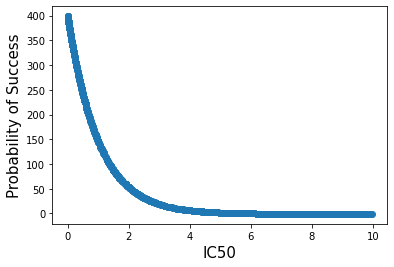

In [18]:
df_mol = df.iloc[:,[0,2,3,4,5]]
lsAct = df_mol.iloc[:,1].tolist()
#lsAct = sorted(lsAct)
#x = [i for i in range(len(lsAct))]
x = df_mol.iloc[:,4].tolist()

plt.xlabel('IC50', fontsize=15)
plt.ylabel('Probability of Success', fontsize=15)
plt.scatter(lsAct, x)
plt.show()

## 4. Algoritma NSGA II

### Supurt function

#### Display

#### Cek Duplikat Individu
Melakukan pengecekan terhadap individu yang sama (mempunyai keseluruhan anggota yang sama) dalam suatu populasi

---
Contoh :


```
a = [1,2,3,4,5]
b = [2,3,4,5,7]
c = [1,5,2,3,4]

pop = [a,b,c]

```
Maka :
```
isDupInd(c,pop) ==> True
isDupInd(b,pop) ==> False
```
---





In [19]:
def isDupInd(individu,population,dfMol = df_mol) :
    same = False
    molName = dfMol["mol_name"]
    molNameList = []
    for gen in individu :
        molNameList.append(gen)
    individu = molNameList
    sizeList = len(individu)
    #print(sizeList)
    count = 0
    for ind in population :
        ind = ind[0]
        for gen in individu :
            if gen in ind :
                count += 1
        
        if count == sizeList :
            #print(count)
            #print("masuk")
            same = True
            break
        else :
            count = 0
    return same


#### Sort by Value
Me-return list berupa index dari element yang sudah terurut(descend)

In [20]:
def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

In [21]:
import math
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))
        values[index_of(min(values),values)] = math.inf
    return sorted_list


In [22]:
def sortByValue(ls) :
    sort = sorted((value,index) for index,value in enumerate(ls))
    sortLs = []
    for x in sort :
        sortLs.append((x[1]))
    return sortLs
#sortByValue(ls)

#### bundling Individu
Menghitung nilai activity dan diversity dari masing - masing Individu

In [39]:
def bundleIndividu(individu,dfMol = df_mol):
    molName = dfMol["mol_name"].tolist()
    molAct = dfMol["mol_act"].tolist()
    molFp = dfMol["mol_fp"].tolist()
    molProb = dfMol["mol_prob"].tolist()
 
    fp_list = []
    n = len(molName)

    def fObjective(individu = individu,dfMol = df_mol) :
    
        def fObj1(individu = individu,dfMol = dfMol) :
            act = []
            molName = dfMol["mol_name"].tolist()
            for idx,x in enumerate(molName) :
                if x  in individu :
                    act.append(dfMol["mol_ex"][idx])
            return np.sum(act)
        
        def fObj2(individu = individu, dfMol = dfMol) :
            fpList = []
            molFp = []
            molFpName = []
            molName = dfMol["mol_name"].tolist()
            molFpLs = dfMol["mol_fp"].tolist()
            for idx,x in enumerate(molName) :
                if x in individu :
                    molFpName.append(x)
                    molFp.append(molFpLs[idx])
            n = len(molFp)
            #print("n=",n,len(individu))
            sumDiverse = 0
            divLs = np.zeros([n,n])
            
            for i in range(n):
                 # Update code
                for j in range(n):
                    simT = DataStructs.FingerprintSimilarity(molFp[i],molFp[j])
                    dx = 1 - simT
                    tetha = 0.5
                    fx = np.exp((-1)*tetha*dx)
                    #fx = round(fx,2)
                    divLs[i][j] = fx
            
            #handle determinan = 0
            handleDet = 0.0000001
            countDet = 1
            sameCorr = []
            for i in range(n) :
                for j in range(n) :
                    if i > j :

                        if divLs[i][j] in sameCorr :
                            #print(divLs[i][j])
                            a = divLs[i][j] - (divLs[i][j]*countDet*handleDet)
                            #print(divLs[i][j],a)
                            divLs[i][j] = a
                            divLs[j][i] = a
                            countDet += 1
                        else :
                            sameCorr.append(divLs[i][j])



            #print(divLs)
            #print(np.linalg.det(divLs))
            #print(divLs)
            e = np.ones(n)
            eT = np.transpose(e)
            divLsInv = np.linalg.inv(divLs)
            sumDiverse = e.dot(divLsInv).dot(eT)
            #print(divLsInv)
            #sumDiverse = np.sum(divLsInv)

            # update code
            sumdiverse = 0
            """for i in divLsInv :
                for j in i :
                    sumDiverse += abs(j)
                    #print(abs(j))"""
            
            #print(sumDiverse)
            #sumDiverse = 50
            return sumDiverse


        return fObj1(), fObj2()
    fObj1,fObj2 = fObjective()
    
    if [individu,fObj1,fObj2] is not None :
        return [individu,fObj1,fObj2]
    else :
        return []


In [40]:
o = np.ones([4,4])
sum = 0
for i in o :
    print("---")
    for j in i :
        sum += j
print(sum)
si = -9
print(abs(si))

---
---
---
---
16.0
9


In [41]:
pop = initPopulation(1,100)
a = pop[0][0]
b = pop[0][1]


In [34]:
molName = df_mol["mol_name"].tolist()
molFp = df_mol["mol_fp"].tolist()

for idx,mol in enumerate(molName):
    if mol in a:
        print(molFp[idx])

#### Extract Individu
mengekstract nilai pada setiap individu yang terdapat pada 1 populasi

In [27]:
def unpackInd(population) :
    fMaxObj1 = []
    fMaxObj2 = []
    solution = []
    for idx,individu in enumerate(population) :
        #print(idx)
        solution.append(individu[0])
        fMaxObj1.append(individu[1]) # Probabilitas Kesuksesan
        fMaxObj2.append(individu[2]) # Diversity   
    return [solution,fMaxObj1,fMaxObj2]

### Inisialisasi populasi

Pada proses ini akan dihasilkan sekumpulan nPortfolio individu (Portfolio). Setiap individu terdiri dari nGen Gen (Molekul)

In [28]:
def initPopulation(nPortfolio,nGen,dfMol=df_mol):
    def initIndividu(dfMol = df_mol,nGen=nGen):
        randIndividu = []
        while(len(randIndividu) < nGen) :
            gen = rd.randint(0,len(dfMol)-1)
            if gen not in randIndividu:
                randIndividu.append(gen)
        #print(len(randIndividu))
        return randIndividu

    molName = dfMol["mol_name"].tolist()
    molAct = dfMol["mol_act"].tolist()
    molFp = dfMol["mol_fp"].tolist()
    molProb = dfMol["mol_prob"].tolist()
    population = []
    
    nSubset = dfMol.shape[0]

    for i in range(nPortfolio) :
        randIndividu = initIndividu()

        if i > 0 :
            while(isDupInd(randIndividu,population)) :
                randIndividu = initIndividu()

        molNameList = []
        for j in randIndividu :
            molNameList.append(molName[j])     
        individu = molNameList
        bInd = bundleIndividu(individu)
        population.append(bInd)
    return population

### Generate Offspring ( crossover and mutation )
Pada proses ini akan dihasilkan sekumpulan individu sebanyak 2 kali lipat dari populasi sebelumnya. Untuk mendapatkannya dilakukan :

*   Crossover
*   Mutation

Hal yang harus dihindari : Pengulangan individu yang sama dalam 1 populasi baru



In [29]:
def generateOffspring(population,dfMol = df_mol,pCo = 0.5,pMut=0.2) :
    sizeOfPop = len(population)

    def duplicateMol(parent) :
        parent1,parent2 = parent
        dupGen = []
        for gen in parent1 :
            if gen in parent2 :
                dupGen.append(gen)
        return dupGen

    def generateParent(population=population, sizeOfPop = sizeOfPop):
        parent1 = population[rd.randint(0,sizeOfPop-1)][0]
        parent2 = population[rd.randint(0,sizeOfPop-1)][0]
        return [parent1,parent2]

    def crossover(parent,pCo = pCo) :
       
        randCo = rd.random()
        parents = generateParent()
        parent1,parent2 = (parents)
        dupMol = ((duplicateMol(parents)))
        parent1 = list(set(parent1)-set(dupMol))
        parent2 = list(set(parent2)-set(dupMol))
        nGen = len(parent1)
        
        nPoint = 0.5
        barier = math.floor(nGen*nPoint) 

        if randCo < pCo :
            offspring1 = parent1[:barier]+parent2[barier:]
            offspring2 = parent2[:barier]+parent1[barier:]
        else :
            offspring1 = parent1
            offspring2 = parent2
        offspring1 += dupMol
        offspring2 += dupMol
        return ([offspring1,offspring2])

   # Flip mutation 
    def mutation(individu,pMut = pMut,pMr = 0.5,dfMol = dfMol) :
        randMut = rd.uniform(0,1)
        newOffspring = []
        if randMut > pMut :
            newInd = []
            molName = [mol for mol in dfMol["mol_name"] if mol not in individu]
            for idx,gen in enumerate(individu) :
                randRep = rd.uniform(0,1)
                if randRep > pMr :
                    newMol = rd.choice(molName)
                    while(newMol in individu) :
                        individu[idx] = rd.choice(molName)


        return individu



    
    # Start Generate
    solution = []
    while(len(solution) < 2*sizeOfPop):
        parents = generateParent()
        offSpring = crossover(parents)
        for x in offSpring :
            if len(solution) > 0 :
                if not isDupInd(x,solution) :
                    solution.append(bundleIndividu(mutation(x),dfMol))
                else :
                    continue
            else :
                 solution.append(bundleIndividu(mutation(x),dfMol))
    return solution


### Non-Dominated Sorted

Proses Sorting berdasarkan prinsip non dominance antar fungsi

In [30]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front



### Crowding Distance
Untuk meng-eliminasi beberapa individu yang mempunyai perfomansi sama

In [31]:
def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])

    sorted2 = sort_by_values(front, values2[:])
    
    distance[0] = math.inf
    distance[len(front) - 1] = math.inf
    for k in range(1,len(front)-1):

        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
        
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

### Main Program

Start
200


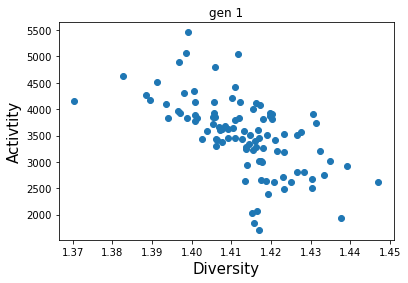

200


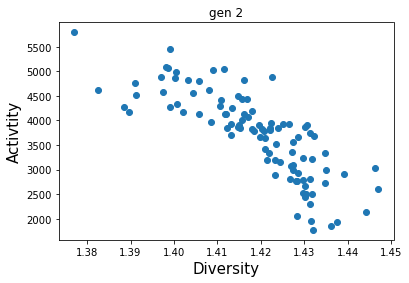

201


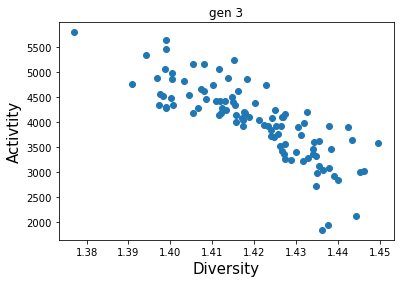

201


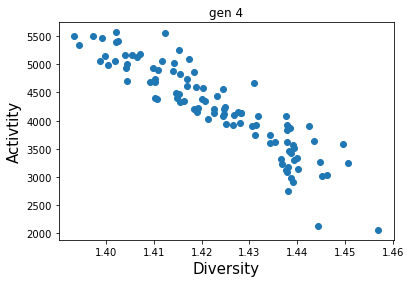

200


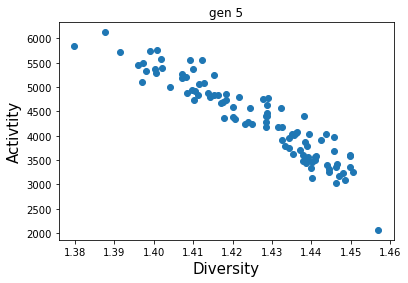

200


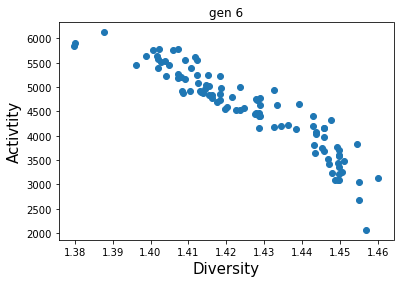

201


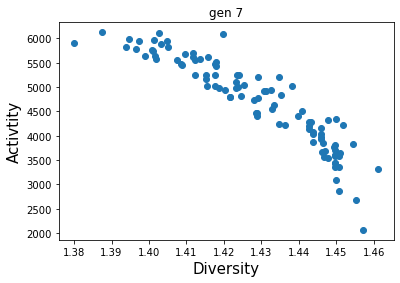

201


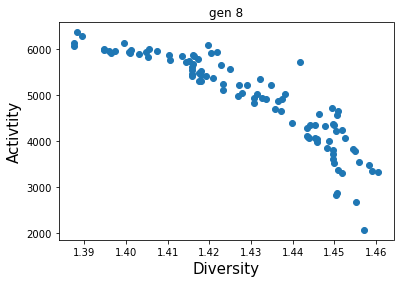

201


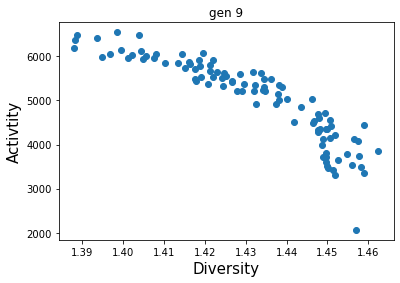

201


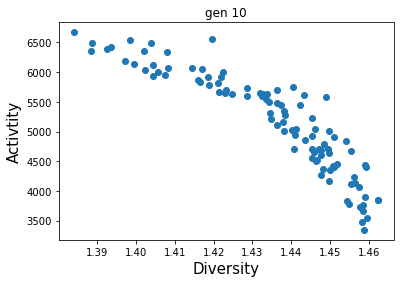

201


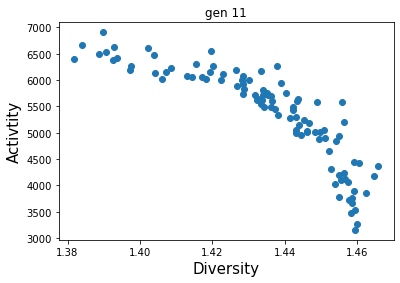

200


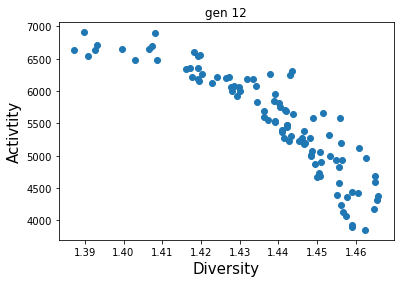

201


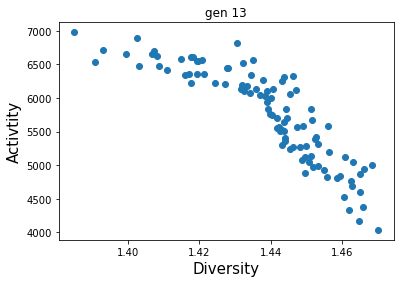

200


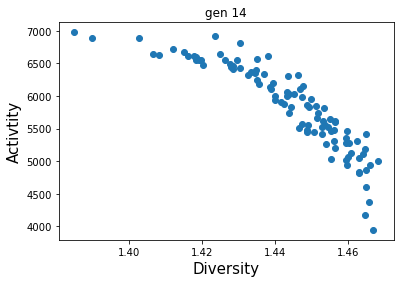

201


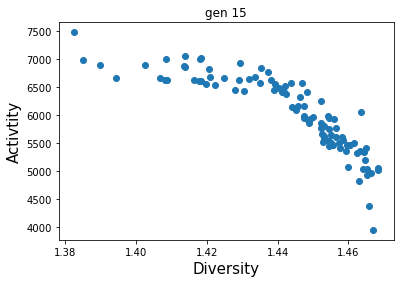

200


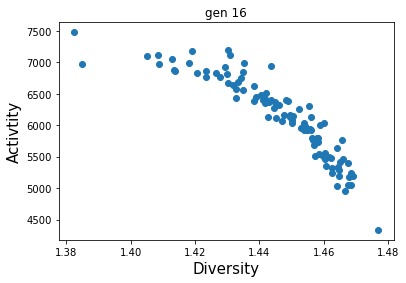

200


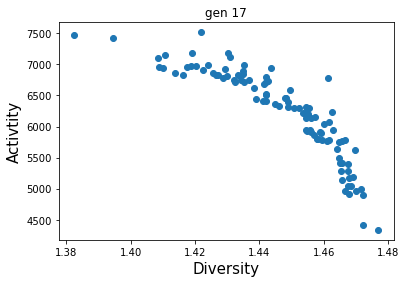

200


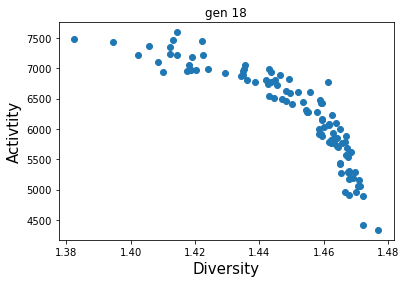

201


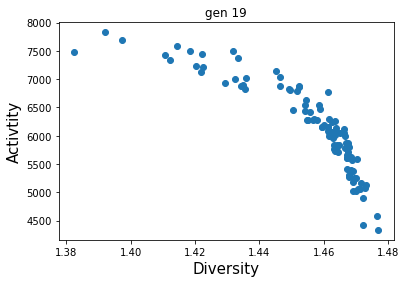

200


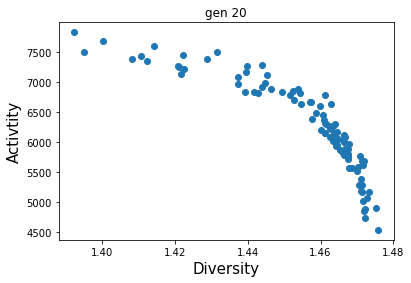

201


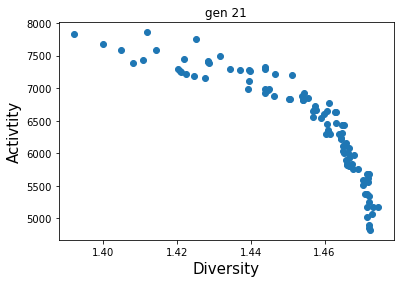

201


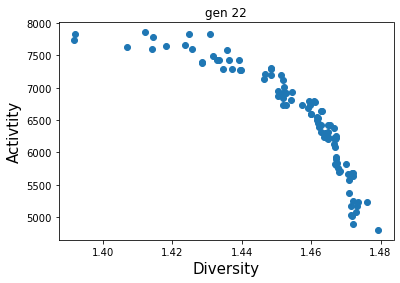

200


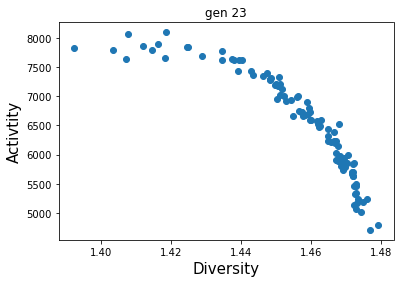

200


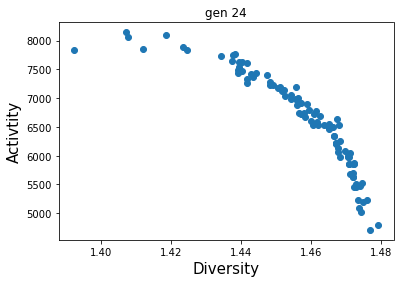

200


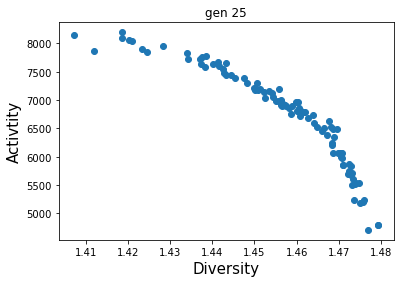

201


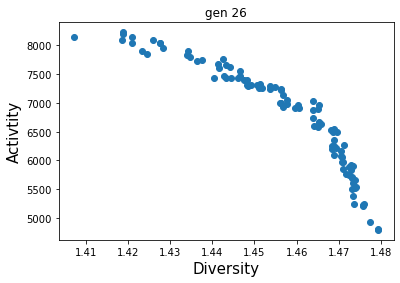

200


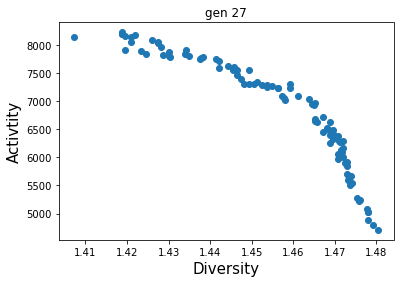

200


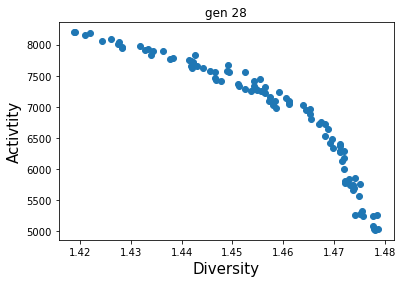

201


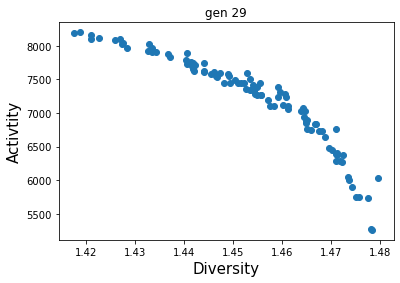

200


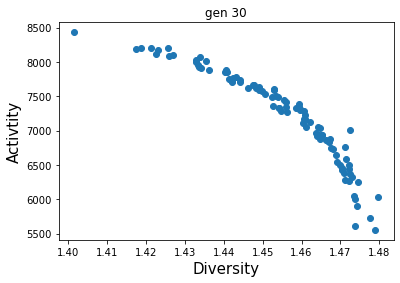

200


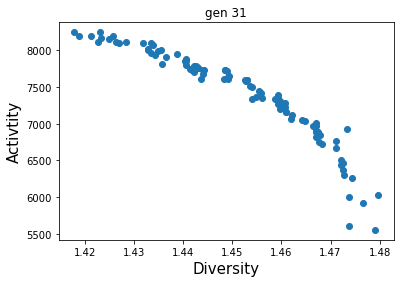

201


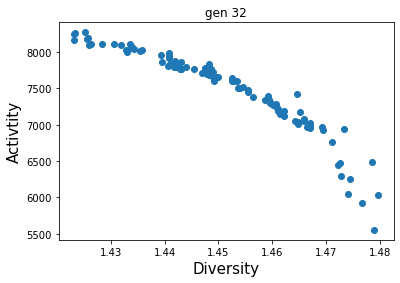

200


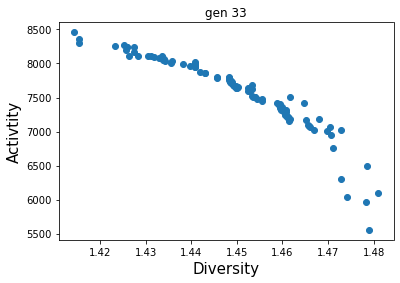

200


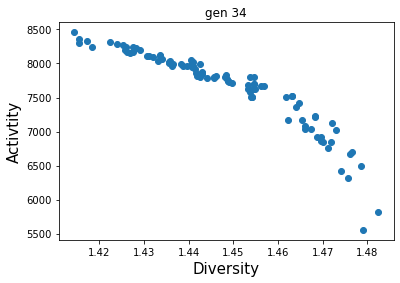

201


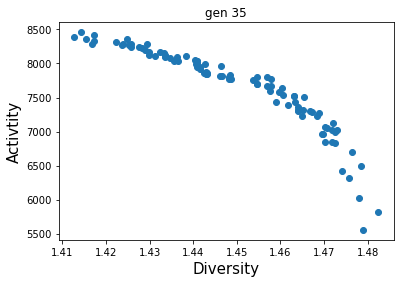

200


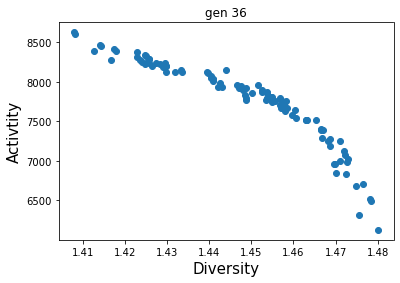

200


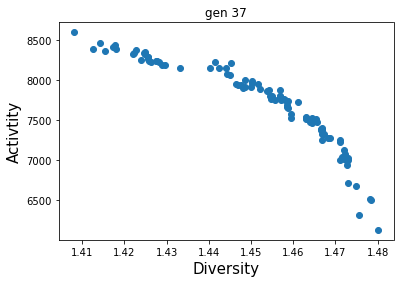

200


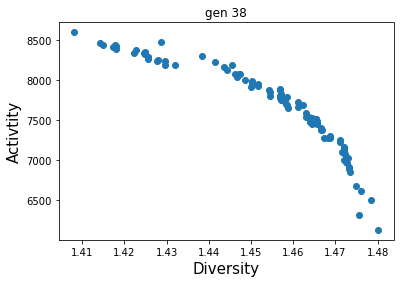

200


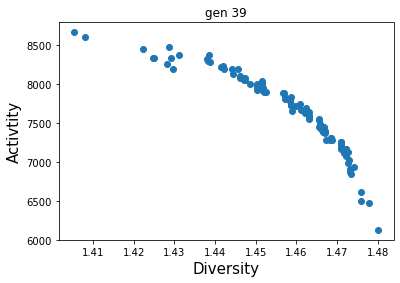

200


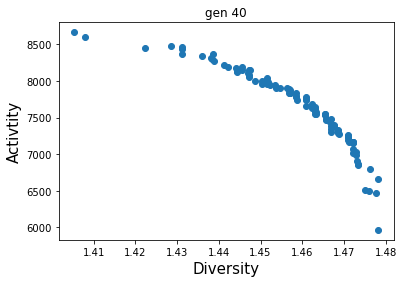

201


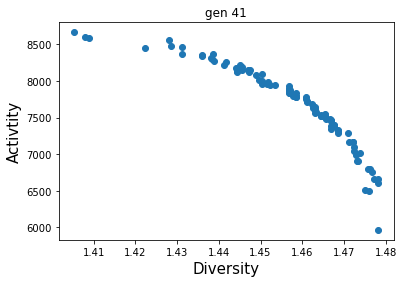

200


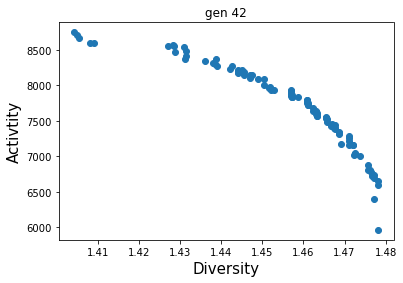

200


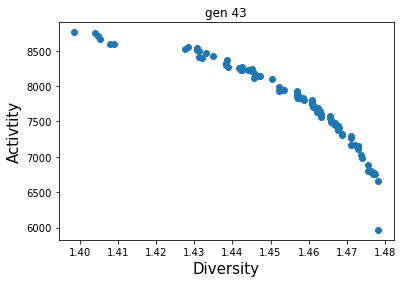

201


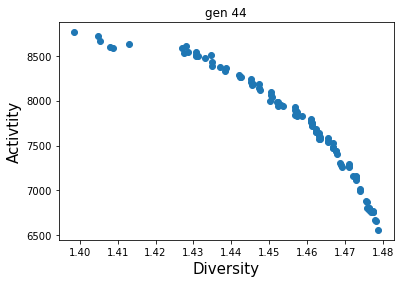

200


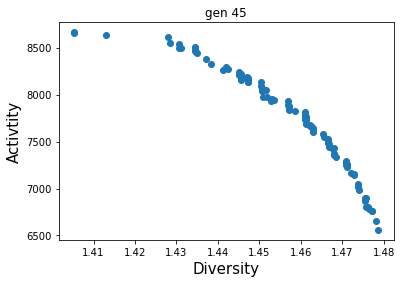

200


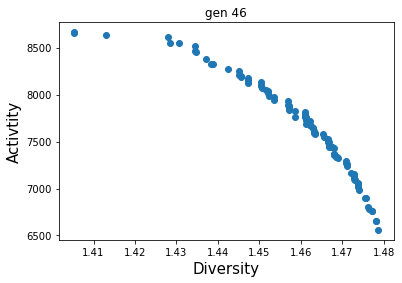

200


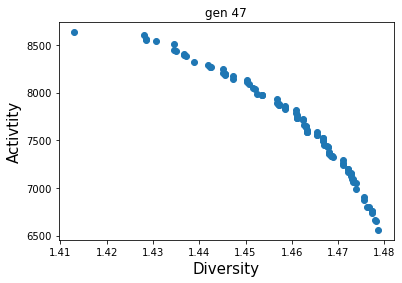

201


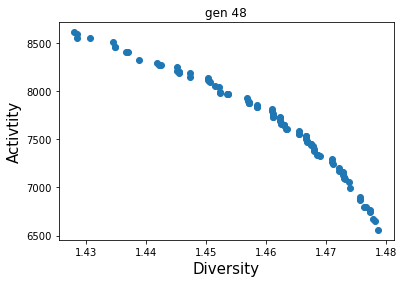

200


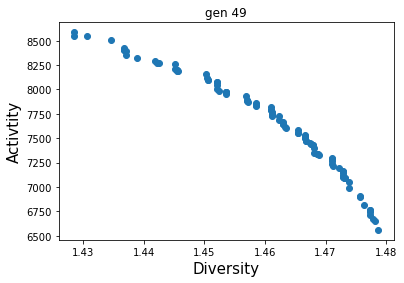

200


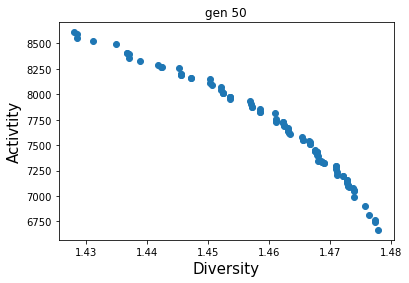

In [43]:
# Parameter
import matplotlib.pyplot as plt
maxGen = 50
gen_0 = 0
nGen = 25
nPortfolio = 100 # banyaknya individu dalam satu populasi


# Step 1 Generate Population
population = initPopulation(nPortfolio,nGen)
initFobj1 = unpackInd(population)[1]
initFobj2 = unpackInd(population)[2]

print("Start")
for gen in range(maxGen) :
    #print("gen ", gen+1, "Start!")

    # Step 2 Generate Offsprings
   
    offsprings = generateOffspring(population)
    fObj1 = unpackInd(offsprings)[1]
    fObj2 = unpackInd(offsprings)[2]
    print(len(fObj1))
    
    # Step 3 Fast Non Dominated
    nonDominatedSorted = fast_non_dominated_sort(fObj1[:],fObj2[:])
    
    # Step 4 crowding distance
    crowdingDistance = []
    for i in range(len(nonDominatedSorted)) :
        crowdingDistance.append(crowding_distance(fObj1[:],fObj2[:],nonDominatedSorted[i][:]))
    

    # Step 5 Individu selection
    newNonDominatedSorted = []
    new_solution = []

    for i in range(0,len(nonDominatedSorted)):  

        # step 5.1 assign sort by index dari crowding distance

        front22 = sortByValue(crowdingDistance[i][:])
        if gen == 1 :
            cSave = crowdingDistance[i][:]
            fSave = front22

        # step 5.2 memasukkan nilai dari non_dominated .. berdasrkan urutan crowding

        front = []
        for j in range(len(nonDominatedSorted[i])):
            front.append(nonDominatedSorted[i][front22[j]])

        # Step 5.3 masukin ke new_sol sesuai dengan keperluan pop_size

        for value in front:
            new_solution.append(value)
            
            if(len(new_solution)==nPortfolio):
                break 
                
        if (len(new_solution) == nPortfolio):
            break
    
    population = [offsprings[i] for i in new_solution]

    maxFObj1 = unpackInd(population)[1]
    maxFObj2 = unpackInd(population)[2]

    plt.title("gen "+str(gen+1))
    plt.xlabel('Diversity', fontsize=15)
    plt.ylabel('Activtity', fontsize=15)
    plt.scatter(maxFObj2, maxFObj1)
    
    plt.show()
    #clear_output(wait=True)
    

    

In [ ]:
# Parameter
import matplotlib.pyplot as plt
maxGen = 50
gen_0 = 0
nGen = 50
nPortfolio = 100 # banyaknya individu dalam satu populasi


# Step 1 Generate Population
population = initPopulation(nPortfolio,nGen)
initFobj1 = unpackInd(population)[1]
initFobj2 = unpackInd(population)[2]

print("Start")
for gen in range(maxGen) :
    #print("gen ", gen+1, "Start!")

    # Step 2 Generate Offsprings
   
    offsprings = generateOffspring(population)
    fObj1 = unpackInd(offsprings)[1]
    fObj2 = unpackInd(offsprings)[2]
    print(len(fObj1))
    
    # Step 3 Fast Non Dominated
    nonDominatedSorted = fast_non_dominated_sort(fObj1[:],fObj2[:])
    
    # Step 4 crowding distance
    crowdingDistance = []
    for i in range(len(nonDominatedSorted)) :
        crowdingDistance.append(crowding_distance(fObj1[:],fObj2[:],nonDominatedSorted[i][:]))
    

    # Step 5 Individu selection
    newNonDominatedSorted = []
    new_solution = []

    for i in range(0,len(nonDominatedSorted)):  

        # step 5.1 assign sort by index dari crowding distance

        front22 = sortByValue(crowdingDistance[i][:])
        if gen == 1 :
            cSave = crowdingDistance[i][:]
            fSave = front22

        # step 5.2 memasukkan nilai dari non_dominated .. berdasrkan urutan crowding

        front = []
        for j in range(len(nonDominatedSorted[i])):
            front.append(nonDominatedSorted[i][front22[j]])

        # Step 5.3 masukin ke new_sol sesuai dengan keperluan pop_size

        for value in front:
            new_solution.append(value)
            
            if(len(new_solution)==nPortfolio):
                break
                
        if (len(new_solution) == nPortfolio):
            break
    
    population = [offsprings[i] for i in new_solution]

    maxFObj1 = unpackInd(population)[1]
    maxFObj2 = unpackInd(population)[2]

    plt.title("gen "+str(gen+1))
    plt.xlabel('Diversity', fontsize=15)
    plt.ylabel('Activtity', fontsize=15)
    plt.scatter(maxFObj2, maxFObj1)
    
    plt.show()
    #clear_output(wait=True)

In [36]:
# Parameter
import matplotlib.pyplot as plt
maxGen = 50
gen_0 = 0
nGen = 10
nPortfolio = 100 # banyaknya individu dalam satu populasi


# Step 1 Generate Population
population = initPopulation(nPortfolio,nGen)
initFobj1 = unpackInd(population)[1]
initFobj2 = unpackInd(population)[2]

for iteration in range(30) :
    maxGen = 50
    gen_0 = 0
    nGen = 5
    nPortfolio = 100
    print("Start percobaan ke-",iteration+1)
    for gen in range(maxGen) :
        print("gen ", gen+1, "Start!")

        # Step 2 Generate Offsprings
    
        offsprings = generateOffspring(population)
        fObj1 = unpackInd(offsprings)[1]
        fObj2 = unpackInd(offsprings)[2]
        #print(len(fObj1))
        
        # Step 3 Fast Non Dominated
        nonDominatedSorted = fast_non_dominated_sort(fObj1[:],fObj2[:])
        
        # Step 4 crowding distance
        crowdingDistance = []
        for i in range(len(nonDominatedSorted)) :
            crowdingDistance.append(crowding_distance(fObj1[:],fObj2[:],nonDominatedSorted[i][:]))
        

        # Step 5 Individu selection
        newNonDominatedSorted = []
        new_solution = []

        for i in range(0,len(nonDominatedSorted)):  

            # step 5.1 assign sort by index dari crowding distance

            front22 = sortByValue(crowdingDistance[i][:])
            if gen == 1 :
                cSave = crowdingDistance[i][:]
                fSave = front22

            # step 5.2 memasukkan nilai dari non_dominated .. berdasrkan urutan crowding

            front = []
            for j in range(len(nonDominatedSorted[i])):
                front.append(nonDominatedSorted[i][front22[j]])

            # Step 5.3 masukin ke new_sol sesuai dengan keperluan pop_size

            for value in front:
                new_solution.append(value)
                
                if(len(new_solution)==nPortfolio):
                    break
                    
            if (len(new_solution) == nPortfolio):
                break
        
        population = [offsprings[i] for i in new_solution]

        maxFObj1 = unpackInd(population)[1]
        maxFObj2 = unpackInd(population)[2]

        graf = {"x":maxFObj1,"y":maxFObj2}
        dfGraf = pd.DataFrame(graf)
        dfGraf.to_csv("percobaan_20_"+str(iteration+1)+"_"+str(nGen)+".csv")
        #clear_output(wait=True)

Start percobaan ke- 1
gen  1 Start!
gen  2 Start!
gen  3 Start!
gen  4 Start!
gen  5 Start!
gen  6 Start!
gen  7 Start!
gen  8 Start!
gen  9 Start!
gen  10 Start!
gen  11 Start!
gen  12 Start!
gen  13 Start!
gen  14 Start!
gen  15 Start!
gen  16 Start!
gen  17 Start!
gen  18 Start!
gen  19 Start!
gen  20 Start!
gen  21 Start!
gen  22 Start!
gen  23 Start!
gen  24 Start!
gen  25 Start!
gen  26 Start!
gen  27 Start!
gen  28 Start!
gen  29 Start!
gen  30 Start!
gen  31 Start!
gen  32 Start!
gen  33 Start!
gen  34 Start!
gen  35 Start!
gen  36 Start!
gen  37 Start!
gen  38 Start!
gen  39 Start!
gen  40 Start!
gen  41 Start!
gen  42 Start!
gen  43 Start!
gen  44 Start!
gen  45 Start!
gen  46 Start!
gen  47 Start!
gen  48 Start!
gen  49 Start!
gen  50 Start!
Start percobaan ke- 2
gen  1 Start!
gen  2 Start!
gen  3 Start!
gen  4 Start!
gen  5 Start!
gen  6 Start!
gen  7 Start!
gen  8 Start!
gen  9 Start!
gen  10 Start!
gen  11 Start!
gen  12 Start!
gen  13 Start!
gen  14 Start!
gen  15 Start!

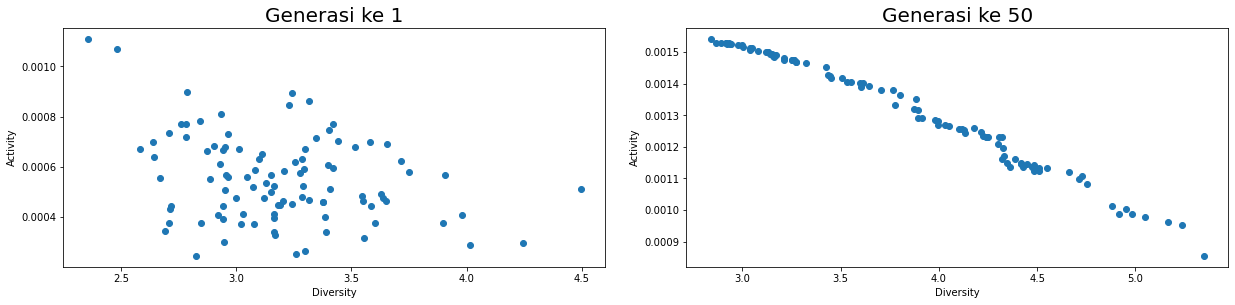

In [67]:
f1 = [initFobj1,maxFObj1]
f2 = [initFobj2,maxFObj2]
title = ["Generasi ke 1","Generasi ke "+str(maxGen)]
n = len(f1)
fig, ax = plt.subplots(ncols=n,figsize=(18,5))
fig.tight_layout(pad=5.0)
for i in range(n) :
    ax[i].scatter(f2[i],f1[i])
    ax[i].set(xlabel="Diversity",ylabel="Activity")
    ax[i].set_title(title[i],fontsize=20)

plt.show()

In [48]:
graf = {"x":maxFObj1,"y":maxFObj2}
dfGraf = pd.DataFrame(graf)
dfGraf.to_csv("fungsi_"+str(nGen)+".csv")

NameError: name 'maxFObj1' is not defined

In [49]:
"""
# Parameter
import matplotlib.pyplot as plt
maxGen = 50
gen_0 = 0
nGen = 10
nPortfolio = 100 # banyaknya individu dalam satu populasi

listMaxGen = [50]
listNgen = [5,10,25,50,100]
listPMut = [0.2,0.4,0.5]
listPCo = [0.2,0.4,0.5]
listPortfolio = [50,100]
# Step 1 Generate Population

for maxGen in listMaxGen :
    for nGen in listNgen :
        for pCo in listPCo :
            for pMut in listPMut :
                for nPortfolio in listPortfolio :
                    gen_0 = 0

                    population = initPopulation(nPortfolio,nGen)
                    initFobj1 = unpackInd(population)[1]
                    initFobj2 = unpackInd(population)[2]

                    print("Start_"+str(maxGen)+"_"+str(nGen)+"_"+str(pCo)+"_"+str(pMut)+"_"+str(nPortfolio))
                    for gen in range(maxGen) :
                        print("gen ", gen+1, "Start!")

                        # Step 2 Generate Offsprings
                    
                        offsprings = generateOffspring(population,pMut = pMut, pCo = pCo)
                        fObj1 = unpackInd(offsprings)[1]
                        fObj2 = unpackInd(offsprings)[2]
                        #print(len(fObj1))
                        
                        # Step 3 Fast Non Dominated
                        nonDominatedSorted = fast_non_dominated_sort(fObj1[:],fObj2[:])
                        
                        # Step 4 crowding distance
                        crowdingDistance = []
                        for i in range(len(nonDominatedSorted)) :
                            crowdingDistance.append(crowding_distance(fObj1[:],fObj2[:],nonDominatedSorted[i][:]))
                        

                        # Step 5 Individu selection
                        newNonDominatedSorted = []
                        new_solution = []

                        for i in range(0,len(nonDominatedSorted)):  

                            # step 5.1 assign sort by index dari crowding distance

                            front22 = sortByValue(crowdingDistance[i][:])
                            if gen == 1 :
                                cSave = crowdingDistance[i][:]
                                fSave = front22

                            # step 5.2 memasukkan nilai dari non_dominated .. berdasrkan urutan crowding

                            front = []
                            for j in range(len(nonDominatedSorted[i])):
                                front.append(nonDominatedSorted[i][front22[j]])

                            # Step 5.3 masukin ke new_sol sesuai dengan keperluan pop_size

                            for value in front:
                                new_solution.append(value)
                                
                                if(len(new_solution)==nPortfolio):
                                    break
                                    
                            if (len(new_solution) == nPortfolio):
                                break
                        
                        population = [offsprings[i] for i in new_solution]

                        maxFObj1 = unpackInd(population)[1]
                        maxFObj2 = unpackInd(population)[2]
                    graf = {"x":maxFObj1,"y":maxFObj2}
                    dfGraf = pd.DataFrame(graf)
                    dfGraf.to_csv("fungsi_"+str(nGen)+"_"+str(pCo)+"_"+str(pMut)+"_"+str(nPortfolio)+".csv")
                    print("End_"+str(maxGen)+"_"+str(nGen)+"_"+str(pCo)+"_"+str(pMut)+"_"+str(nPortfolio))

"""

Start_50_5_0.2_0.2_50
gen  1 Start!
gen  2 Start!
gen  3 Start!
gen  4 Start!
gen  5 Start!
gen  6 Start!
gen  7 Start!
gen  8 Start!
gen 9 Start!
gen  10 Start!
gen  11 Start!
gen  12 Start!
gen  13 Start!
gen  14 Start!
gen  15 Start!
gen  16 Start!
gen  17 Start!
gen  18 Start!
gen  19 Start!
gen  20 Start!
gen  21 Start!
gen  22 Start!
gen  23 Start!
gen  24 Start!
gen  25 Start!
gen  26 Start!
gen  27 Start!
gen  28 Start!
gen  29 Start!
gen  30 Start!
gen  31 Start!
gen 32 Start!
gen  33 Start!
gen  34 Start!
gen  35 Start!
gen  36 Start!
gen  37 Start!
gen  38 Start!
gen  39 Start!
gen  40 Start!
gen  41 Start!
gen  42 Start!
gen  43 Start!
gen  44 Start!
gen  45 Start!
gen  46 Start!
gen  47 Start!
gen  48 Start!
gen  49 Start!
gen  50 Start!
End_50_5_0.2_0.2_50
Start_50_5_0.2_0.2_100
gen  1 Start!
gen  2 Start!
gen  3 Start!
gen  4 Start!
gen  5 Start!
gen  6 Start!
gen  7 Start!
gen  8 Start!
gen  9 Start!
gen  10 Start!
gen  11 Start!
gen  12 Start!
gen  13 Start!
gen  14 St

In [50]:
# Parameter
import matplotlib.pyplot as plt


listMaxGen = [50]
listNgen = [5,10,25,50,100]
listPMut = [0.2,0.4,0.5]
listPCo = [0.2,0.4,0.5]
listPortfolio = [50,100]
# Step 1 Generate Population
count = 0
for maxGen in listMaxGen :
    for nGen in listNgen :
        for pCo in listPCo :
            for pMut in listPMut :
                for nPortfolio in listPortfolio :
    
                    print(count+1)                    
                    print("Start_"+str(maxGen)+"_"+str(nGen)+"_"+str(pCo)+"_"+str(pMut)+"_"+str(nPortfolio))
                    print("End_"+str(maxGen)+"_"+str(nGen)+"_"+str(pCo)+"_"+str(pMut)+"_"+str(nPortfolio))
                    count+=1                 


1
Start_50_5_0.2_0.2_50
End_50_5_0.2_0.2_50
2
Start_50_5_0.2_0.2_100
End_50_5_0.2_0.2_100
3
Start_50_5_0.2_0.4_50
End_50_5_0.2_0.4_50
4
Start_50_5_0.2_0.4_100
End_50_5_0.2_0.4_100
5
Start_50_5_0.2_0.5_50
End_50_5_0.2_0.5_50
6
Start_50_5_0.2_0.5_100
End_50_5_0.2_0.5_100
7
Start_50_5_0.4_0.2_50
End_50_5_0.4_0.2_50
8
Start_50_5_0.4_0.2_100
End_50_5_0.4_0.2_100
9
Start_50_5_0.4_0.4_50
End_50_5_0.4_0.4_50
10
Start_50_5_0.4_0.4_100
End_50_5_0.4_0.4_100
11
Start_50_5_0.4_0.5_50
End_50_5_0.4_0.5_50
12
Start_50_5_0.4_0.5_100
End_50_5_0.4_0.5_100
13
Start_50_5_0.5_0.2_50
End_50_5_0.5_0.2_50
14
Start_50_5_0.5_0.2_100
End_50_5_0.5_0.2_100
15
Start_50_5_0.5_0.4_50
End_50_5_0.5_0.4_50
16
Start_50_5_0.5_0.4_100
End_50_5_0.5_0.4_100
17
Start_50_5_0.5_0.5_50
End_50_5_0.5_0.5_50
18
Start_50_5_0.5_0.5_100
End_50_5_0.5_0.5_100
19
Start_50_10_0.2_0.2_50
End_50_10_0.2_0.2_50
20
Start_50_10_0.2_0.2_100
End_50_10_0.2_0.2_100
21
Start_50_10_0.2_0.4_50
End_50_10_0.2_0.4_50
22
Start_50_10_0.2_0.4_100
End_50_10_0

crossover =  0.2
Mut = 0.2
nGen =  5
nPortfolio =  50


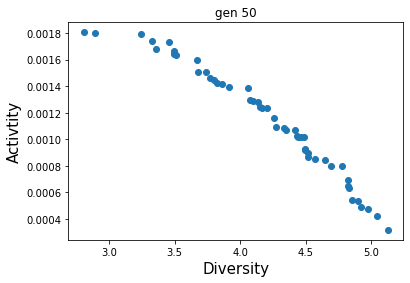

crossover =  0.2
Mut = 0.2
nGen =  5
nPortfolio =  100


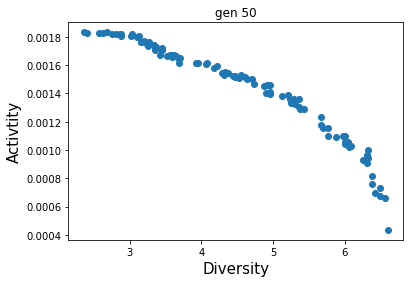

crossover =  0.2
Mut = 0.4
nGen =  5
nPortfolio =  50


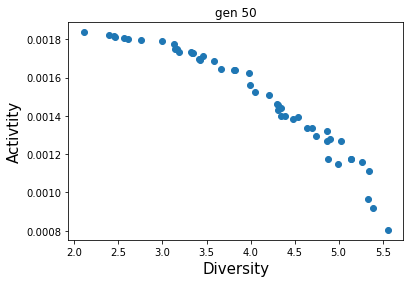

crossover =  0.2
Mut = 0.4
nGen =  5
nPortfolio =  100


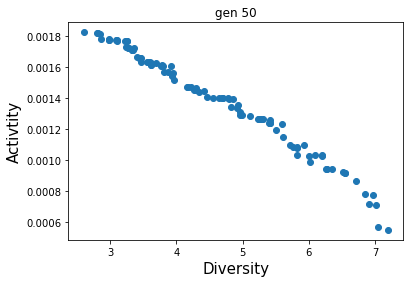

crossover =  0.2
Mut = 0.5
nGen =  5
nPortfolio =  50


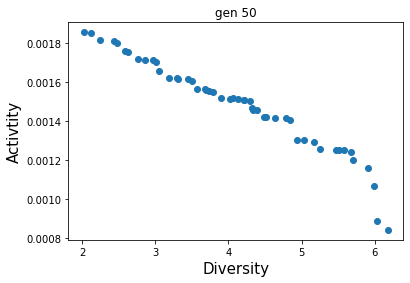

crossover =  0.2
Mut = 0.5
nGen =  5
nPortfolio =  100


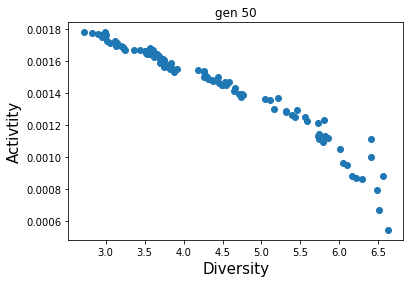

crossover =  0.4
Mut = 0.2
nGen =  5
nPortfolio =  50


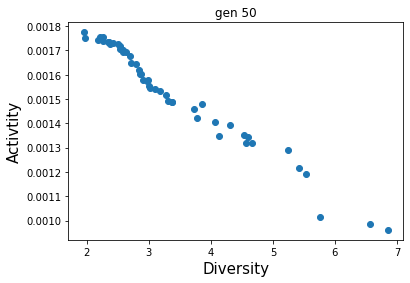

crossover =  0.4
Mut = 0.2
nGen =  5
nPortfolio =  100


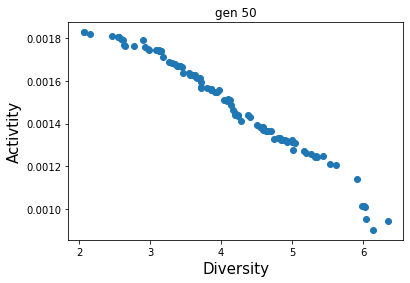

crossover =  0.4
Mut = 0.4
nGen =  5
nPortfolio =  50


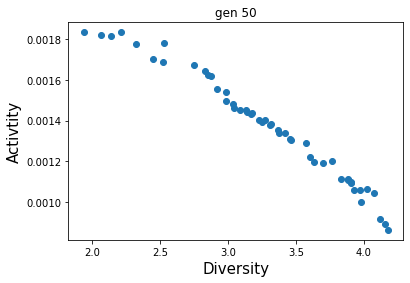

crossover =  0.4
Mut = 0.4
nGen =  5
nPortfolio =  100


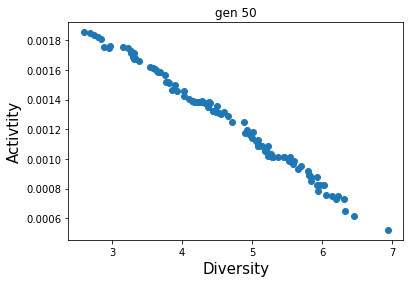

crossover =  0.4
Mut = 0.5
nGen =  5
nPortfolio =  50


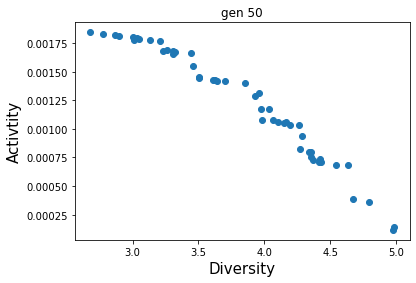

crossover =  0.4
Mut = 0.5
nGen =  5
nPortfolio =  100


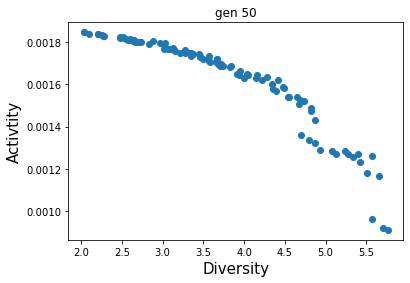

crossover =  0.5
Mut = 0.2
nGen =  5
nPortfolio =  50


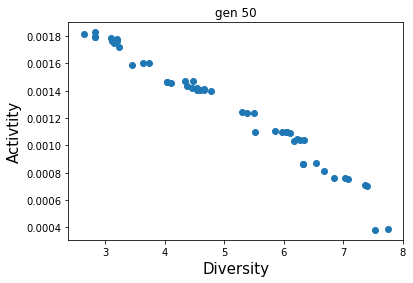

crossover =  0.5
Mut = 0.2
nGen =  5
nPortfolio =  100


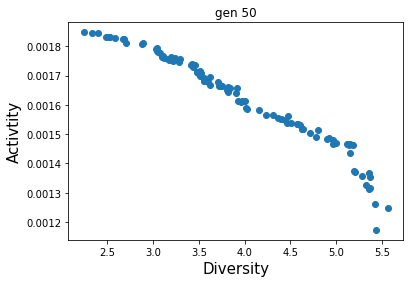

crossover =  0.5
Mut = 0.4
nGen =  5
nPortfolio =  50


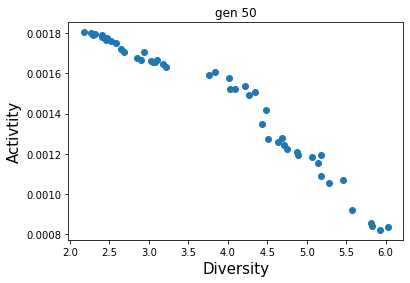

crossover =  0.5
Mut = 0.4
nGen =  5
nPortfolio =  100


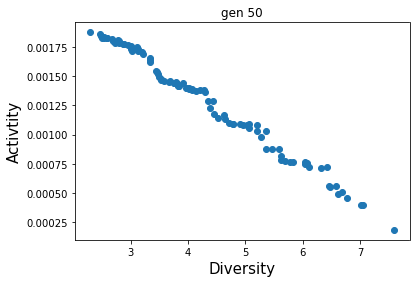

crossover =  0.5
Mut = 0.5
nGen =  5
nPortfolio =  50


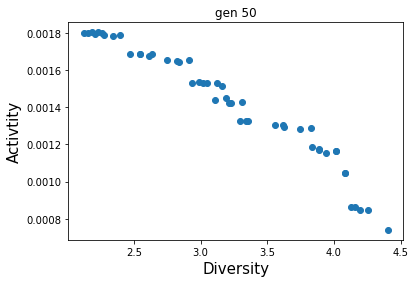

crossover =  0.5
Mut = 0.5
nGen =  5
nPortfolio =  100


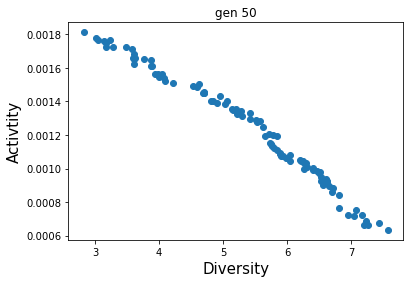

crossover =  0.2
Mut = 0.2
nGen =  10
nPortfolio =  50


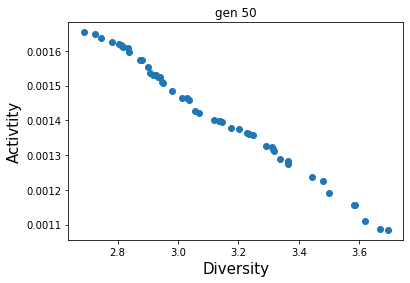

crossover =  0.2
Mut = 0.2
nGen =  10
nPortfolio =  100


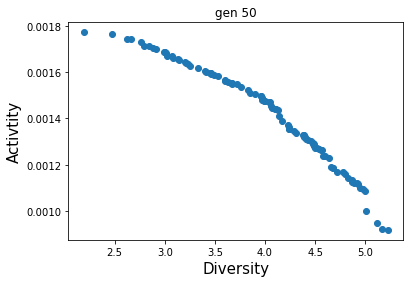

crossover =  0.2
Mut = 0.4
nGen =  10
nPortfolio =  50


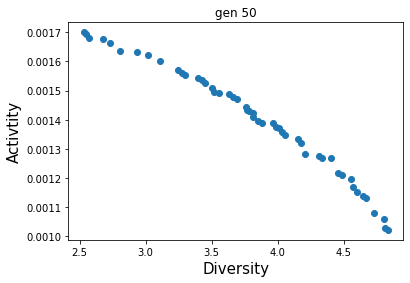

crossover =  0.2
Mut = 0.4
nGen =  10
nPortfolio =  100


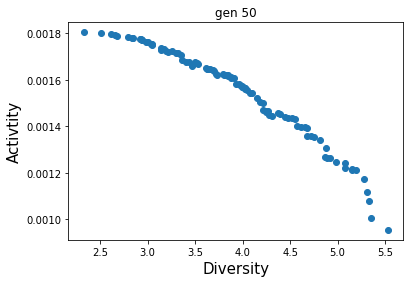

crossover =  0.2
Mut = 0.5
nGen =  10
nPortfolio =  50


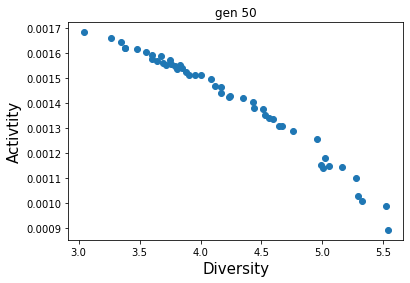

crossover =  0.2
Mut = 0.5
nGen =  10
nPortfolio =  100


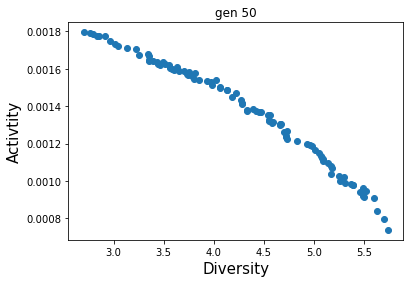

crossover =  0.4
Mut = 0.2
nGen =  10
nPortfolio =  50


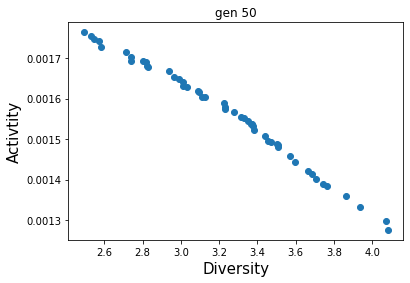

crossover =  0.4
Mut = 0.2
nGen =  10
nPortfolio =  100


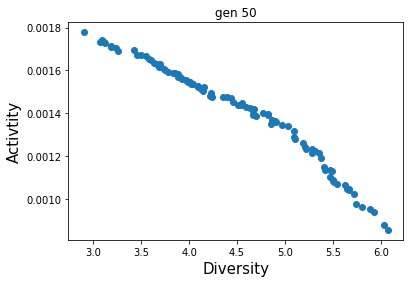

crossover =  0.4
Mut = 0.4
nGen =  10
nPortfolio =  50


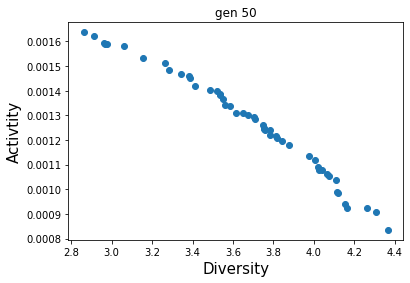

crossover =  0.4
Mut = 0.4
nGen =  10
nPortfolio =  100


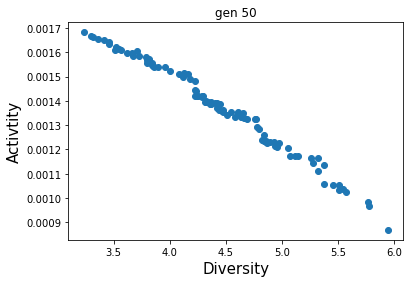

crossover =  0.4
Mut = 0.5
nGen =  10
nPortfolio =  50


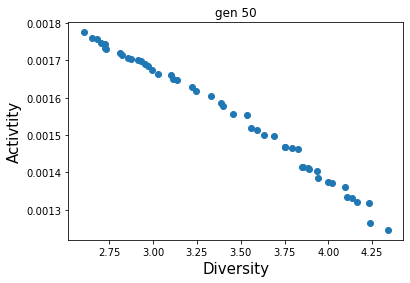

crossover =  0.4
Mut = 0.5
nGen =  10
nPortfolio =  100


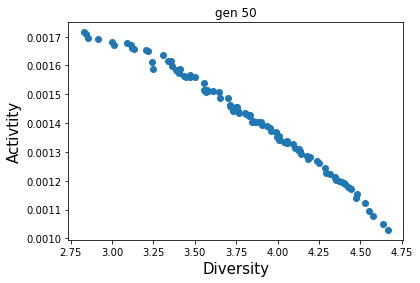

crossover =  0.5
Mut = 0.2
nGen =  10
nPortfolio =  50


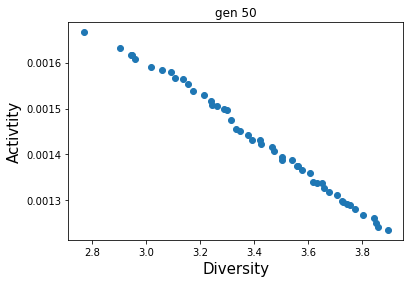

crossover =  0.5
Mut = 0.2
nGen =  10
nPortfolio =  100


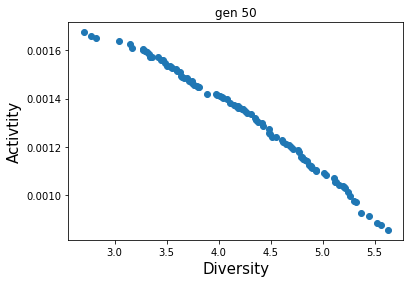

crossover =  0.5
Mut = 0.4
nGen =  10
nPortfolio =  50


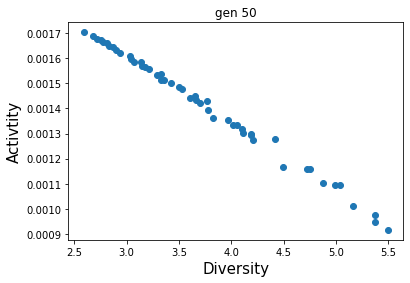

crossover =  0.5
Mut = 0.4
nGen =  10
nPortfolio =  100


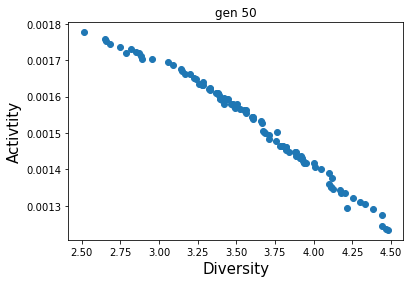

crossover =  0.5
Mut = 0.5
nGen =  10
nPortfolio =  50


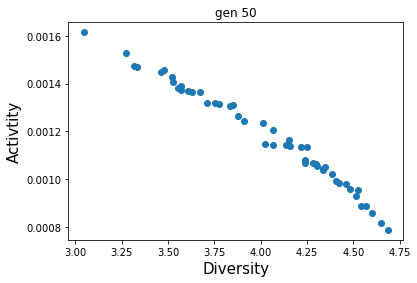

crossover =  0.5
Mut = 0.5
nGen =  10
nPortfolio =  100


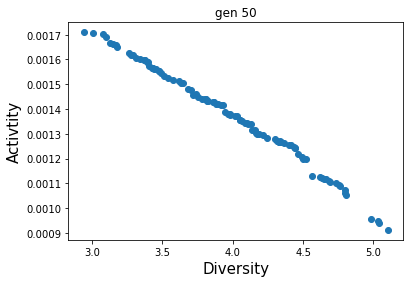

crossover =  0.2
Mut = 0.2
nGen =  25
nPortfolio =  50


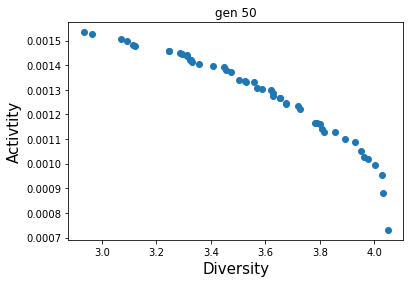

crossover =  0.2
Mut = 0.2
nGen =  25
nPortfolio =  100


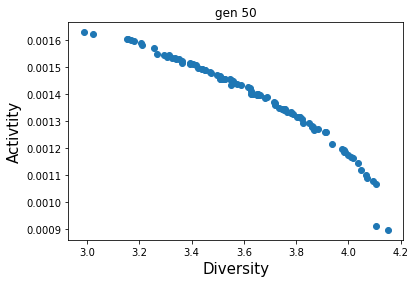

crossover =  0.2
Mut = 0.4
nGen =  25
nPortfolio =  50


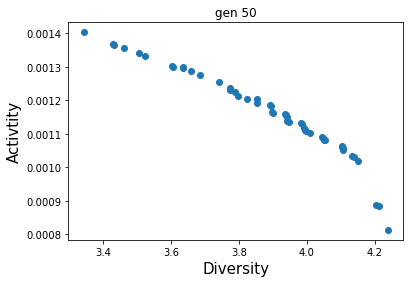

crossover =  0.2
Mut = 0.4
nGen =  25
nPortfolio =  100


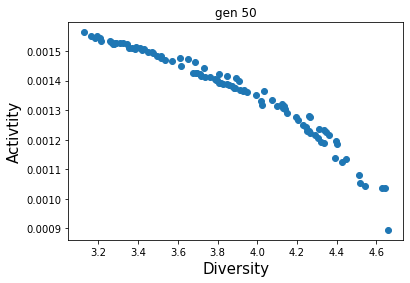

crossover =  0.2
Mut = 0.5
nGen =  25
nPortfolio =  50


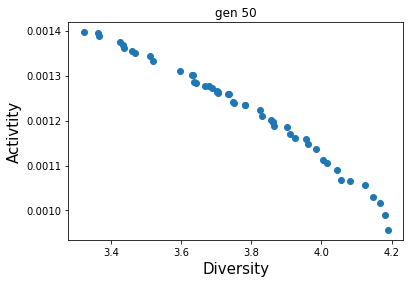

crossover =  0.2
Mut = 0.5
nGen =  25
nPortfolio =  100


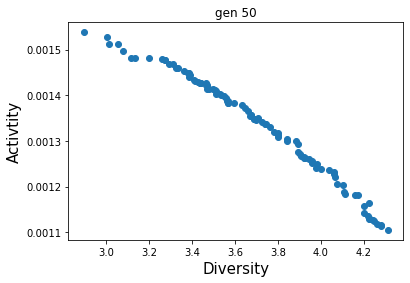

crossover =  0.4
Mut = 0.2
nGen =  25
nPortfolio =  50


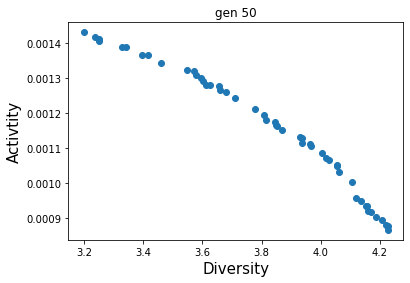

crossover =  0.4
Mut = 0.2
nGen =  25
nPortfolio =  100


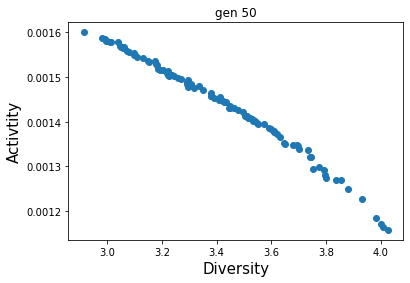

crossover =  0.4
Mut = 0.4
nGen =  25
nPortfolio =  50


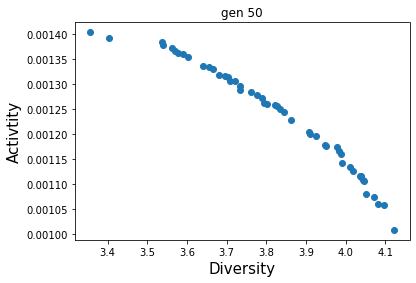

crossover =  0.4
Mut = 0.4
nGen =  25
nPortfolio =  100


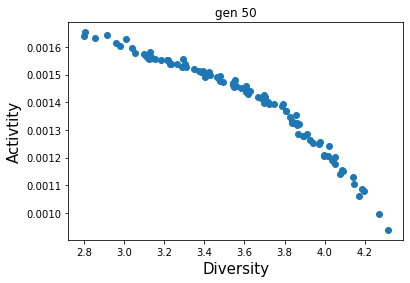

crossover =  0.4
Mut = 0.5
nGen =  25
nPortfolio =  50


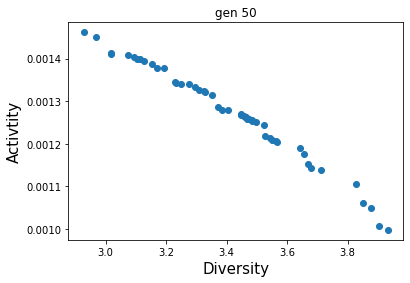

crossover =  0.4
Mut = 0.5
nGen =  25
nPortfolio =  100


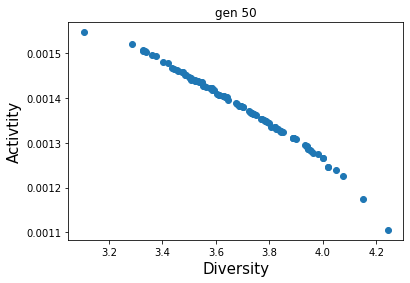

crossover =  0.5
Mut = 0.2
nGen =  25
nPortfolio =  50


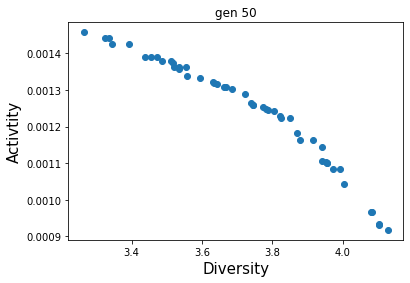

crossover =  0.5
Mut = 0.2
nGen =  25
nPortfolio =  100


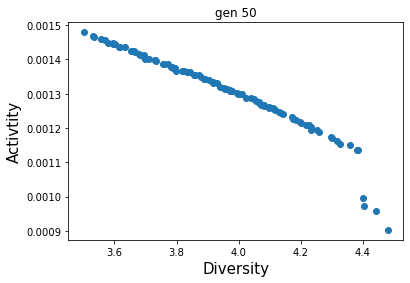

crossover =  0.5
Mut = 0.4
nGen =  25
nPortfolio =  50


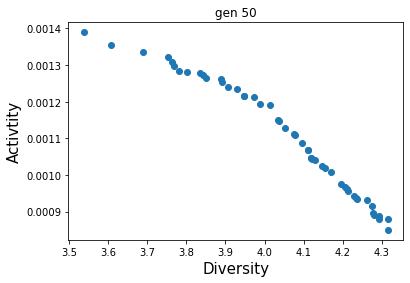

crossover =  0.5
Mut = 0.4
nGen =  25
nPortfolio =  100


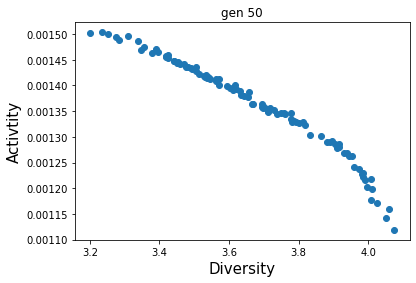

crossover =  0.5
Mut = 0.5
nGen =  25
nPortfolio =  50


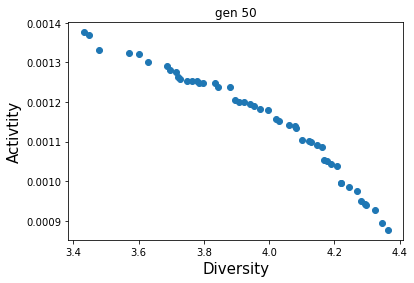

crossover =  0.5
Mut = 0.5
nGen =  25
nPortfolio =  100


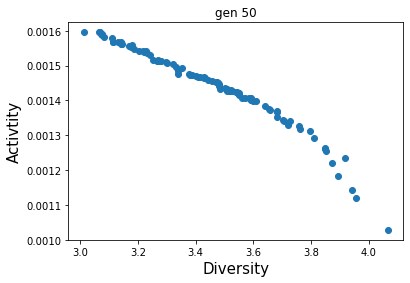

crossover =  0.2
Mut = 0.2
nGen =  50
nPortfolio =  50


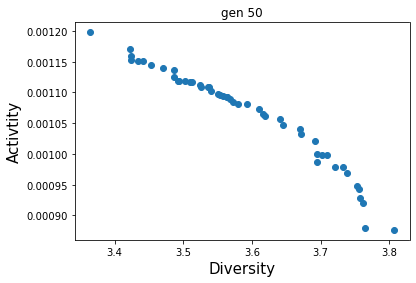

crossover =  0.2
Mut = 0.2
nGen =  50
nPortfolio =  100


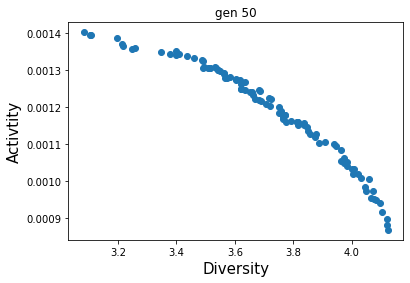

crossover =  0.2
Mut = 0.4
nGen =  50
nPortfolio =  50


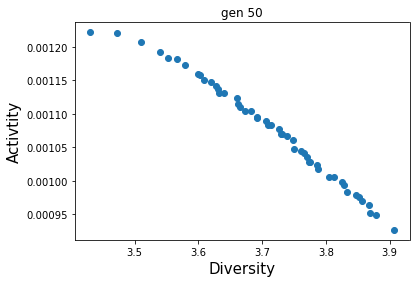

crossover =  0.2
Mut = 0.4
nGen =  50
nPortfolio =  100


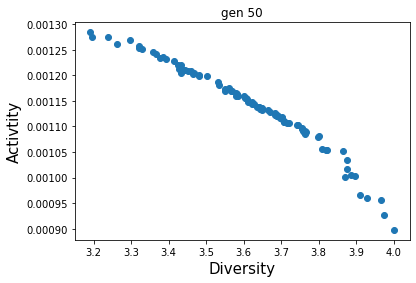

crossover =  0.2
Mut = 0.5
nGen =  50
nPortfolio =  50


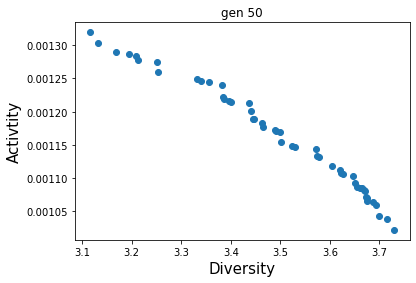

crossover =  0.2
Mut = 0.5
nGen =  50
nPortfolio =  100


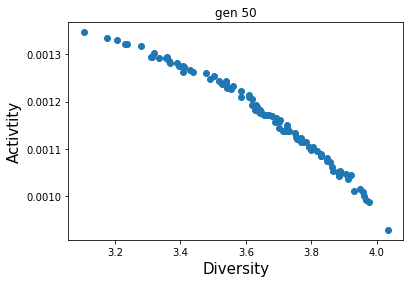

crossover =  0.4
Mut = 0.2
nGen =  50
nPortfolio =  50


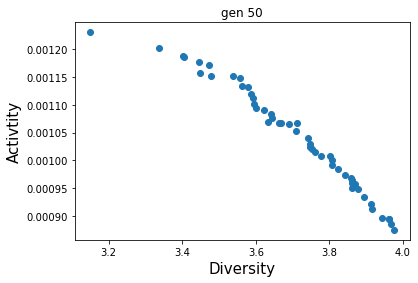

crossover =  0.4
Mut = 0.2
nGen =  50
nPortfolio =  100


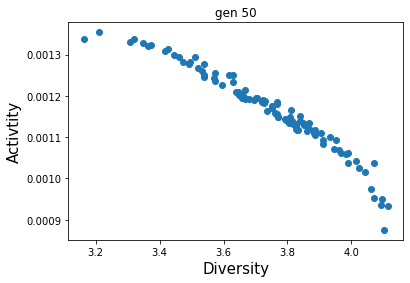

crossover =  0.4
Mut = 0.4
nGen =  50
nPortfolio =  50


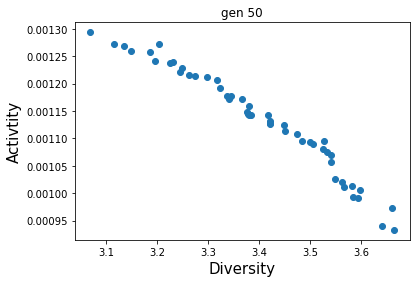

crossover =  0.4
Mut = 0.4
nGen =  50
nPortfolio =  100


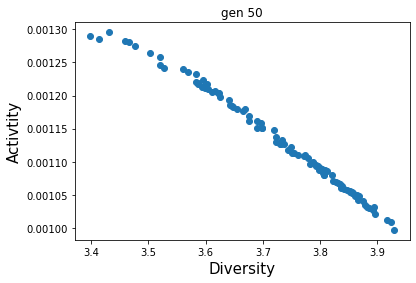

crossover =  0.4
Mut = 0.5
nGen =  50
nPortfolio =  50


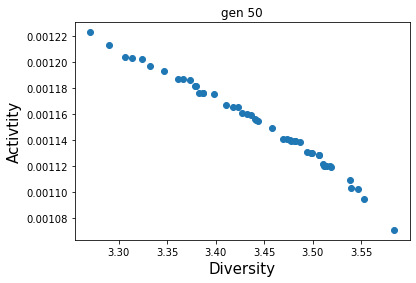

crossover =  0.4
Mut = 0.5
nGen =  50
nPortfolio =  100


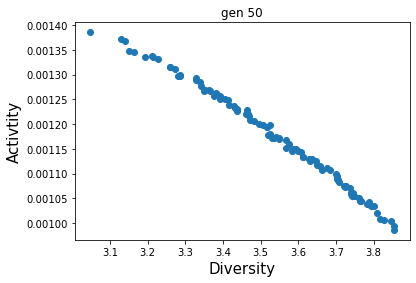

crossover =  0.5
Mut = 0.2
nGen =  50
nPortfolio =  50


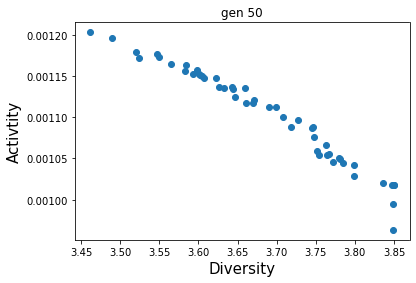

crossover =  0.5
Mut = 0.2
nGen =  50
nPortfolio =  100


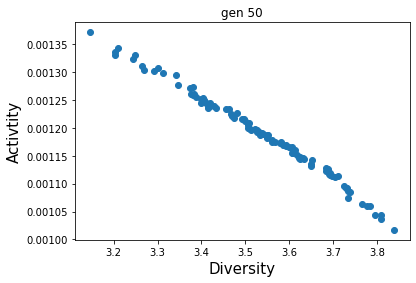

crossover =  0.5
Mut = 0.4
nGen =  50
nPortfolio =  50


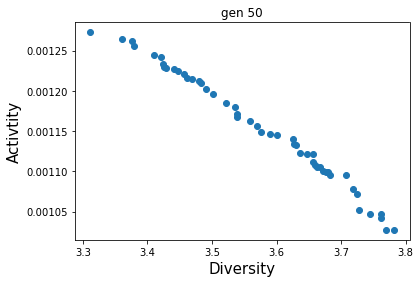

crossover =  0.5
Mut = 0.4
nGen =  50
nPortfolio =  100


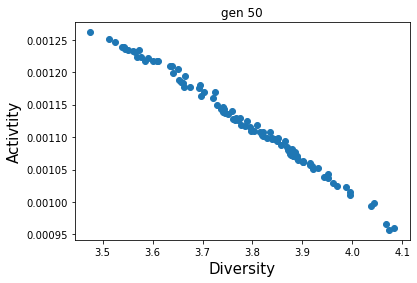

crossover =  0.5
Mut = 0.5
nGen =  50
nPortfolio =  50


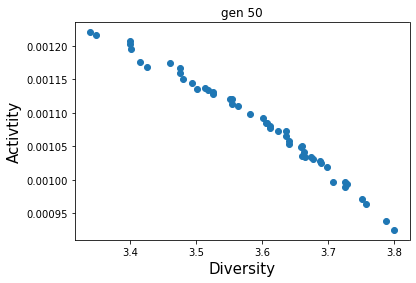

crossover =  0.5
Mut = 0.5
nGen =  50
nPortfolio =  100


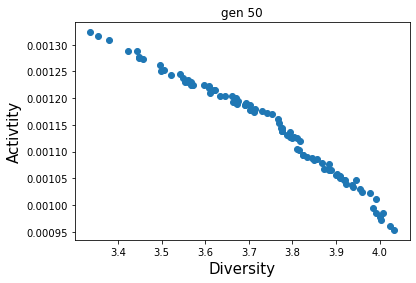

crossover =  0.2
Mut = 0.2
nGen =  100
nPortfolio =  50


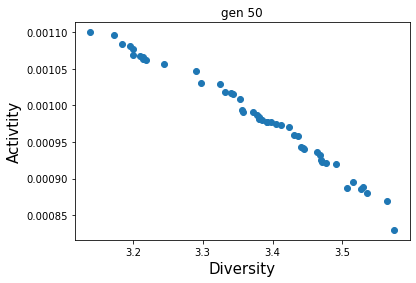

crossover =  0.2
Mut = 0.2
nGen =  100
nPortfolio =  100


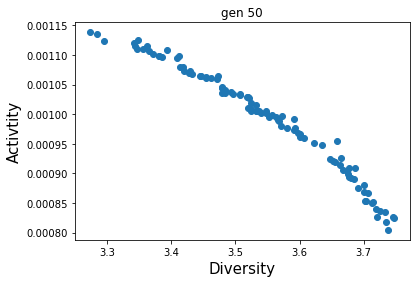

crossover =  0.2
Mut = 0.4
nGen =  100
nPortfolio =  50


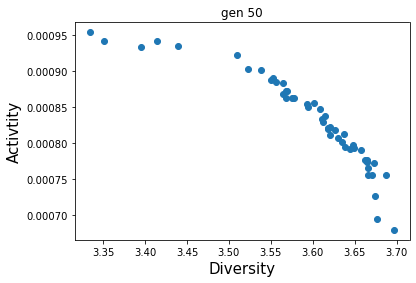

crossover =  0.2
Mut = 0.4
nGen =  100
nPortfolio =  100


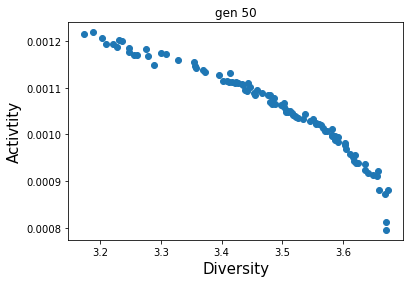

crossover =  0.2
Mut = 0.5
nGen =  100
nPortfolio =  50


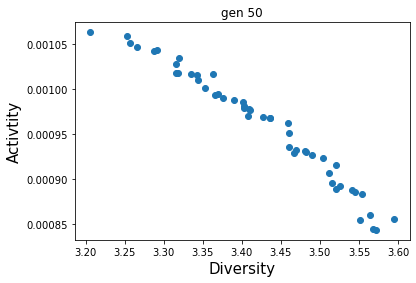

crossover =  0.2
Mut = 0.5
nGen =  100
nPortfolio =  100


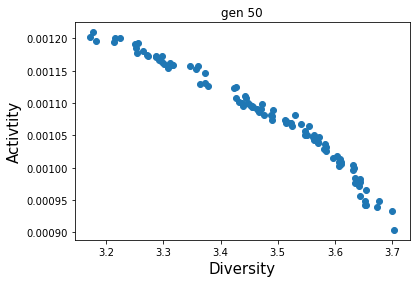

crossover =  0.4
Mut = 0.2
nGen =  100
nPortfolio =  50


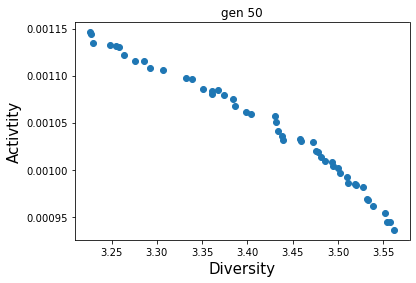

crossover =  0.4
Mut = 0.2
nGen =  100
nPortfolio =  100


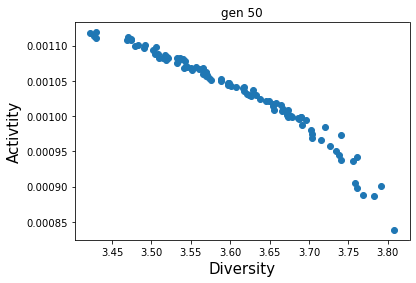

crossover =  0.4
Mut = 0.4
nGen =  100
nPortfolio =  50


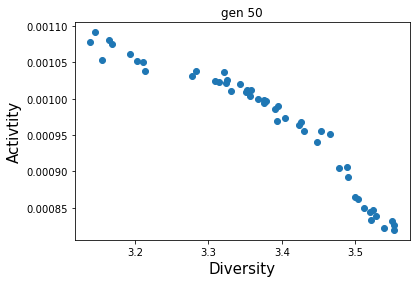

crossover =  0.4
Mut = 0.4
nGen =  100
nPortfolio =  100


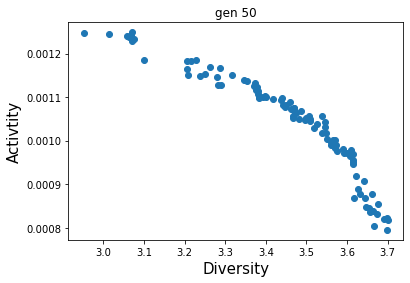

crossover =  0.4
Mut = 0.5
nGen =  100
nPortfolio =  50


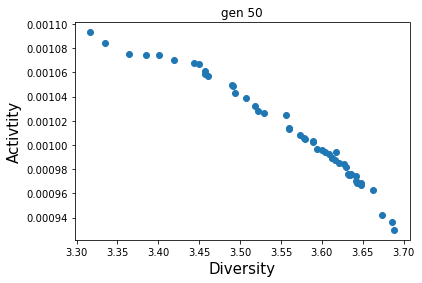

crossover =  0.4
Mut = 0.5
nGen =  100
nPortfolio =  100


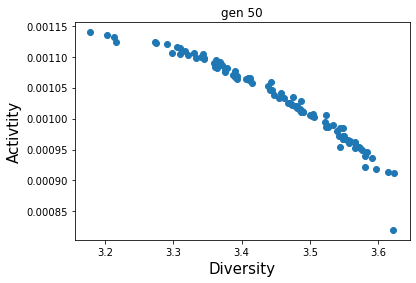

crossover =  0.5
Mut = 0.2
nGen =  100
nPortfolio =  50


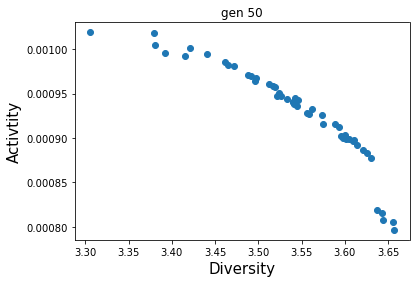

crossover =  0.5
Mut = 0.2
nGen =  100
nPortfolio =  100


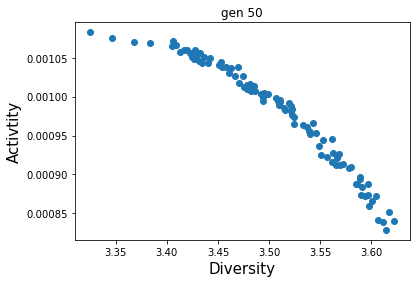

crossover =  0.5
Mut = 0.4
nGen =  100
nPortfolio =  50


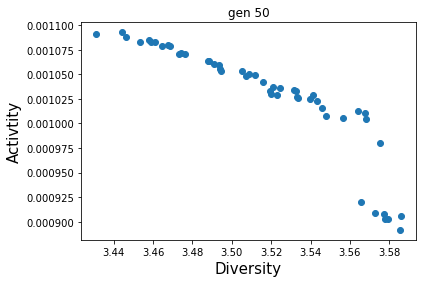

crossover =  0.5
Mut = 0.4
nGen =  100
nPortfolio =  100


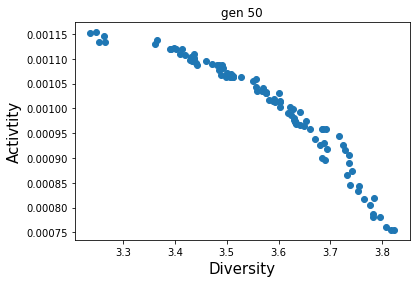

crossover =  0.5
Mut = 0.5
nGen =  100
nPortfolio =  50


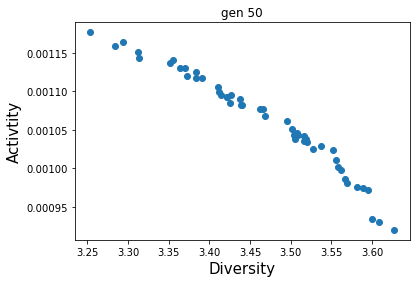

crossover =  0.5
Mut = 0.5
nGen =  100
nPortfolio =  100


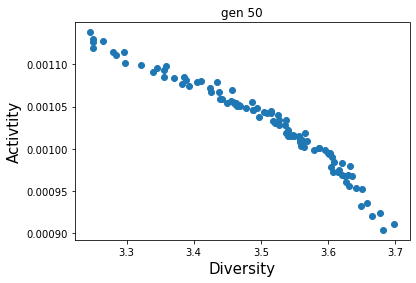

In [52]:
for maxGen in listMaxGen :
    for nGen in listNgen :
        for pCo in listPCo :
            for pMut in listPMut :
                for nPortfolio in listPortfolio :
                    print("crossover = ",pCo)
                    print("Mut =",pMut)
                    print("nGen = ",nGen)
                    print("nPortfolio = ",nPortfolio)
                    dfGraf = pd.read_csv("fungsi_"+str(nGen)+"_"+str(pCo)+"_"+str(pMut)+"_"+str(nPortfolio)+".csv")
                    x = dfGraf["x"].tolist()
                    y = dfGraf["y"].tolist()
                    plt.title("gen "+str(gen+1))
                    plt.xlabel('Diversity', fontsize=15)
                    plt.ylabel('Activtity', fontsize=15)
                    plt.scatter(y, x)
                    plt.show()

